# Amazon Monitor EDA

In [380]:
import pandas as pd #type: ignore
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore
import seaborn as sns #type: ignore

In [381]:
file = 'extracted_product_info_amazon.csv'
df = pd.read_csv(file)
df.head()

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,"acer SB240Y G0bi 23.8"" IPS Full HD Ultra-Slim ...",acer,23.8 Inches,FHD 1080p,16:9,4.4,94.99
1,"acer Nitro 31.5"" FHD 1920 x 1080 1500R Curved ...",acer,31.5 Inches,FHD 1080p,16:9,4.6,259.99
2,"Acer SB272 EBI 27"" Full HD (1920 x 1080) IPS Z...",acer,27 Inches,FHD 1080p,16:9,4.5,99.99
3,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,Sceptre,30 Inches,FHD 1080p Ultra Wide,21:9,4.5,199.97
4,"SAMSUNG 32"" UJ59 Series 4K UHD (3840x2160) Com...",SAMSUNG,31.5 Inches,4K UHD 2160p,16:9,4.3,279.99


In [382]:
df.shape

(947, 7)

The dataset has 947 rows and 7 columns.

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         947 non-null    object
 1   Brand         947 non-null    object
 2   Screen Size   947 non-null    object
 3   Resolution    947 non-null    object
 4   Aspect Ratio  947 non-null    object
 5   Rating        947 non-null    object
 6   Price         947 non-null    object
dtypes: object(7)
memory usage: 51.9+ KB


All of the columns are object datatypes. Price, rating, and size need to converted into float datatype.

In [384]:
df.describe()

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
count,947,947,947,947,947,947,947
unique,296,62,57,41,16,25,166
top,"ASUS 31.5” 1080P Monitor (VA329HE) - Full HD, ...",acer,27 Inches,FHD 1080p,16:9,4.6,199.99
freq,84,532,260,566,833,368,122


In [385]:
#change price to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

#dropping all rows that contain 'previous' for the rating
df['Rating'] = df['Rating'].astype(str)
index = df[df['Rating'].str.contains('Previous')].index
df = df.drop(index)

#changing rating to float
df['Rating'] = df['Rating'].astype(float)

#changing screen size to float
df['Screen Size'] = df['Screen Size'].astype(str).str.replace('Inches','').astype(float)

In [386]:
# removing all numeric outliers
def remove_outliers2(df):
    q1 = df.select_dtypes('number').quantile(0.25)
    q3 = df.select_dtypes('number').quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return df[~((df.select_dtypes('number') < lower_bound) | (df.select_dtypes('number') > upper_bound)).any(axis=1)]

df2 = remove_outliers2(df)
df2

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,"acer SB240Y G0bi 23.8"" IPS Full HD Ultra-Slim ...",acer,23.8,FHD 1080p,16:9,4.4,94.99
1,"acer Nitro 31.5"" FHD 1920 x 1080 1500R Curved ...",acer,31.5,FHD 1080p,16:9,4.6,259.99
2,"Acer SB272 EBI 27"" Full HD (1920 x 1080) IPS Z...",acer,27.0,FHD 1080p,16:9,4.5,99.99
3,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,Sceptre,30.0,FHD 1080p Ultra Wide,21:9,4.5,199.97
4,"SAMSUNG 32"" UJ59 Series 4K UHD (3840x2160) Com...",SAMSUNG,31.5,4K UHD 2160p,16:9,4.3,279.99
...,...,...,...,...,...,...,...
941,"Acer Nitro 31.5"" WQHD 2560 x 1440 1500R Curved...",acer,31.5,QHD Wide 1440p,16:9,4.6,219.99
942,"acer SB270 G0bi 27"" IPS Full HD (1920 x 1080) ...",acer,27.0,FHD 1080p,16:9,4.5,147.35
943,"ASUS 31.5” 1080P Monitor (VA329HE) - Full HD, ...",ASUS,32.0,FHD 1080p,16:9,4.5,157.99
944,"Acer Predator XB273K V3bmiiprx 27"" UHD 3840x21...",acer,27.0,4K UHD 2160p,16:9,4.4,399.99


In [387]:
# creating new columns based on keywords in the Title or Resolution columns

df2['UHD'] = df2['Resolution'].str.contains('UHD')
df2['FHD'] = df2['Resolution'].str.contains('FHD' or 'Full HD')

df2['Gaming'] = df2['Title'].str.contains('Gaming')
df2['Curved'] = df2['Title'].str.contains('Curved')
df2['HDR'] = df2['Title'].str.contains('HDR')
df2['Adaptive'] = df2['Title'].str.contains('Adaptive')
df2['Blue_Light'] = df2['Title'].str.contains('Blue Light')
df2['AMD_FreeSync'] = df2['Title'].str.contains('AMD FreeSync')
df2['Height_Adjust'] = df2['Title'].str.contains('Height Adjustable')
df2['Tilt'] = df2['Title'].str.contains('Tilt')
df2['Ultra_Thin'] = df2['Title'].str.contains('Ultra Thin' or 'Ultra-Thin')

/var/folders/m0/vvh521x51xd_22g8gkz0gpdr0000gn/T/ipykernel_74104/1524112103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['UHD'] = df2['Resolution'].str.contains('UHD')
/var/folders/m0/vvh521x51xd_22g8gkz0gpdr0000gn/T/ipykernel_74104/1524112103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['FHD'] = df2['Resolution'].str.contains('FHD' or 'Full HD')
/var/folders/m0/vvh521x51xd_22g8gkz0gpdr0000gn/T/ipykernel_74104/1524112103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a c

## Univariate Plots

### Price

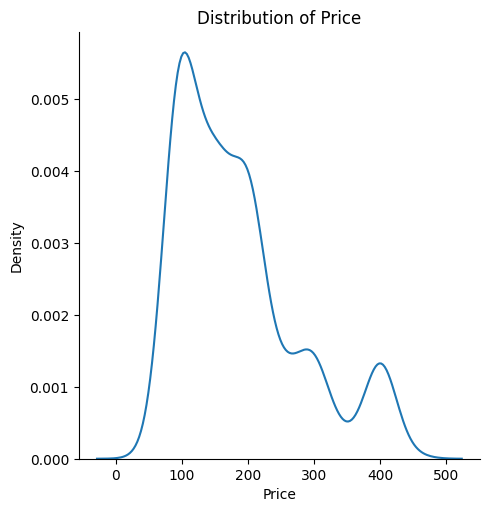

In [388]:
fig = sns.displot(data = df2, x= 'Price', kind = 'kde')
plt.title('Distribution of Price')
plt.show()

### Rating

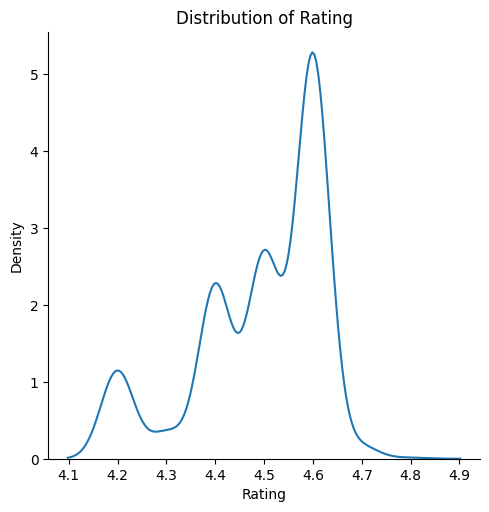

In [389]:
fig = sns.displot(data = df2, x= 'Rating', kind = 'kde')
plt.title('Distribution of Rating')
plt.show()

### Screen Size

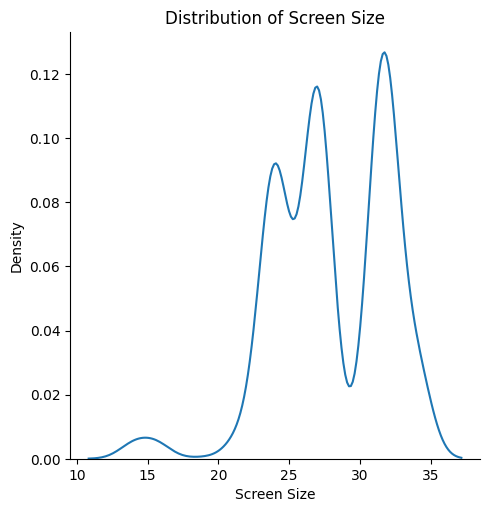

In [390]:
fig = sns.displot(data = df2, x= 'Screen Size', kind = 'kde')
plt.title('Distribution of Screen Size')
plt.show()

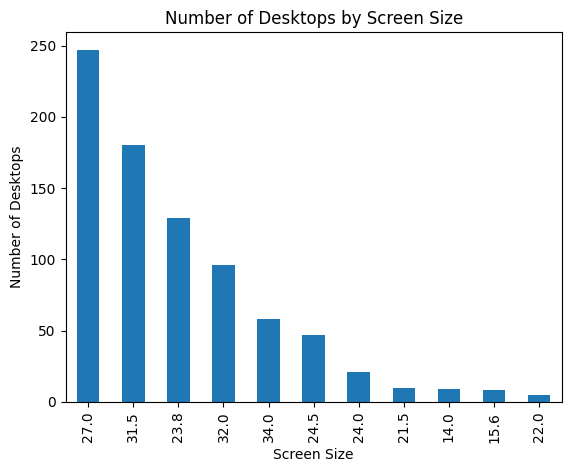

In [391]:
top_screen = df2['Screen Size'].value_counts().nlargest(11)     #finding the top 11 screen sizes

top_screen.plot(kind='bar')    #plotting the top screen sizes by value_counts
plt.title('Number of Desktops by Screen Size')
plt.ylabel('Number of Desktops')
plt.show()

### Brand

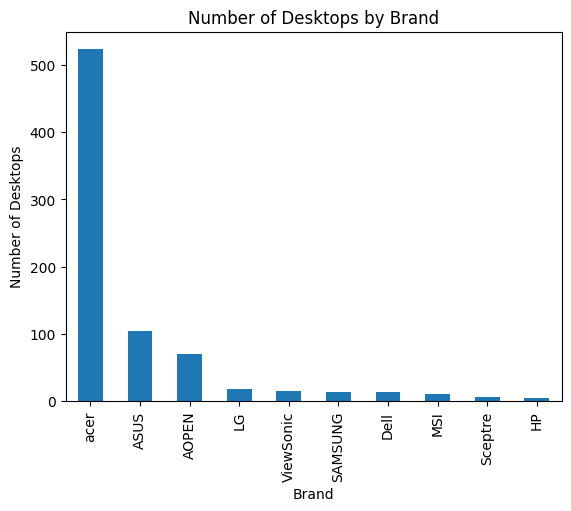

In [392]:
top_brands = df2['Brand'].value_counts().nlargest(10)      #finding top 10 brands by value_counts

top_brands.plot(kind = 'bar')    #plotting the top 10 brands by value_count
plt.title('Number of Desktops by Brand')
plt.ylabel('Number of Desktops')
plt.show()

### Resolution

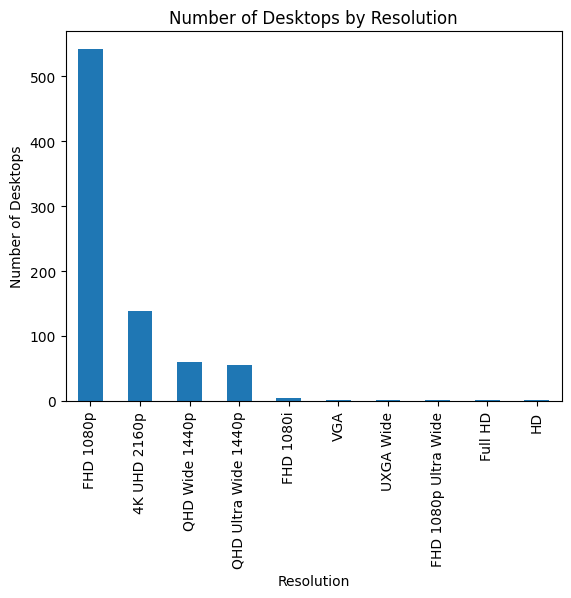

In [393]:
top_res = df2['Resolution'].value_counts().nlargest(10)     #top 10 resolutions

top_res.plot(kind='bar')
plt.title('Number of Desktops by Resolution')
plt.ylabel('Number of Desktops')
plt.show()

### Aspect Ratio

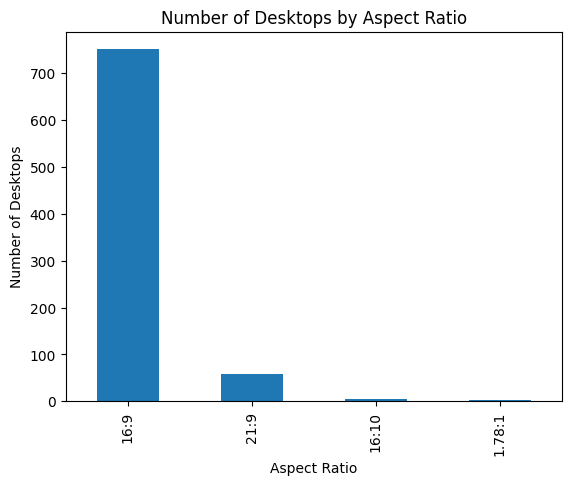

In [394]:
top_aspect = df2['Aspect Ratio'].value_counts().nlargest(4)

top_aspect.plot(kind='bar')
plt.title('Number of Desktops by Aspect Ratio')
plt.ylabel('Number of Desktops')
plt.show()

## Multivariate Plots

### Rating vs Price

<Axes: xlabel='Rating', ylabel='Price'>

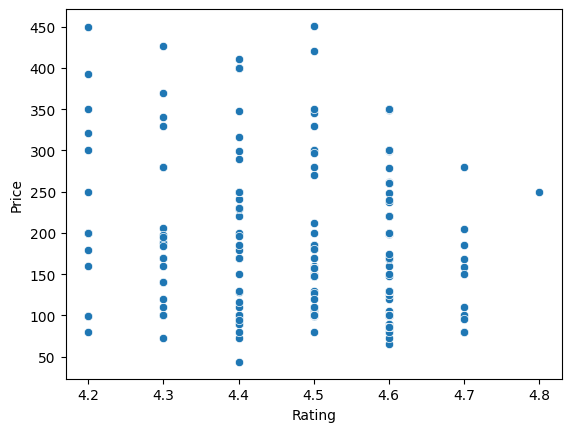

In [395]:
sns.scatterplot(data=df2, x='Rating', y='Price')

### Screen Size vs Price

<Axes: xlabel='Screen Size', ylabel='Price'>

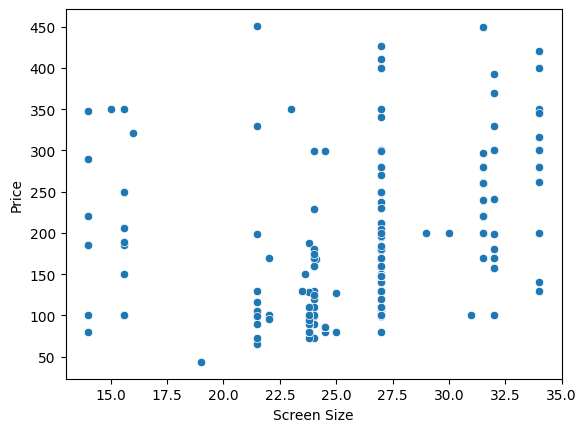

In [396]:
sns.scatterplot(data=df2, x='Screen Size', y= 'Price')

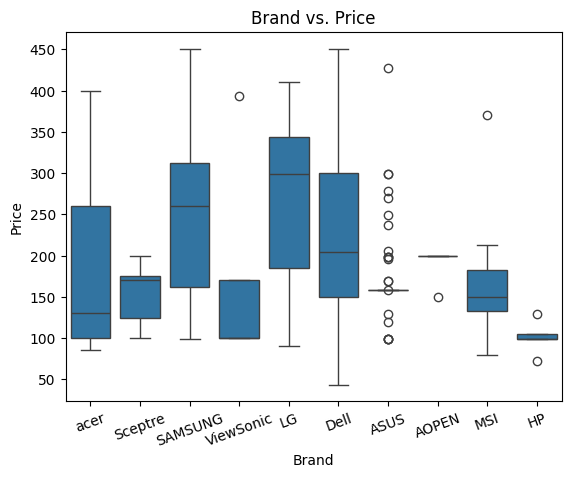

In [397]:
top_brands_index = top_brands.index
df_top_brands = df2[df2['Brand'].isin(top_brands_index)]

sns.boxplot(data=df_top_brands, x='Brand', y='Price')
plt.title('Brand vs. Price')
plt.xticks(rotation=20)
plt.show()

### Resolution vs Price

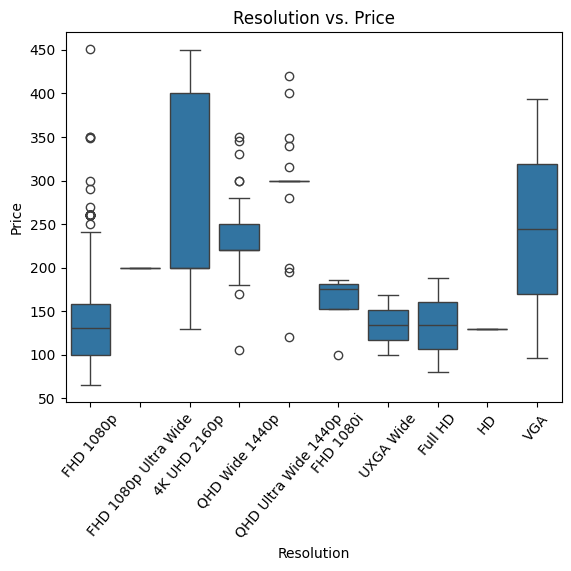

In [398]:
top_res_index = top_res.index
df_top_res = df2[df2['Resolution'].isin(top_res_index)]

sns.boxplot(data = df_top_res, x='Resolution', y='Price')
plt.title('Resolution vs. Price')
plt.xticks(rotation=50)     #changing font rotation
plt.show()

<Axes: xlabel='FHD', ylabel='Price'>

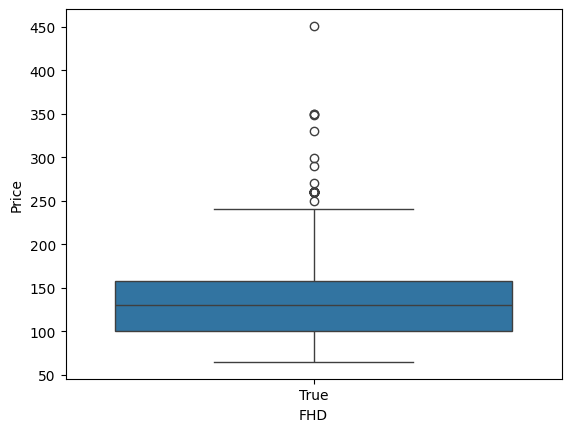

In [399]:
sns.boxplot(data=df2[df2['FHD']== True], x='FHD', y='Price')

<Axes: xlabel='UHD', ylabel='Price'>

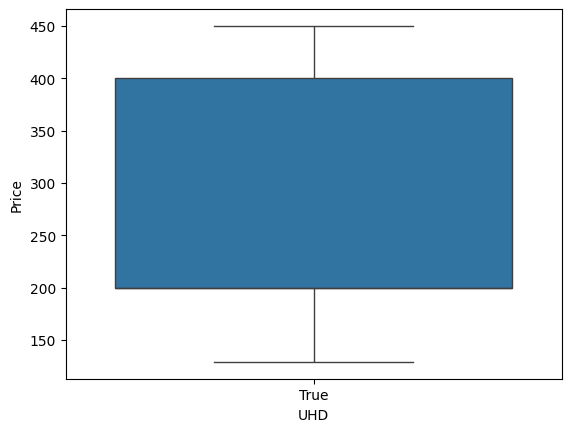

In [400]:
sns.boxplot(data=df2[df2['UHD']== True], x='UHD', y='Price')

### Aspect Ratio vs Price

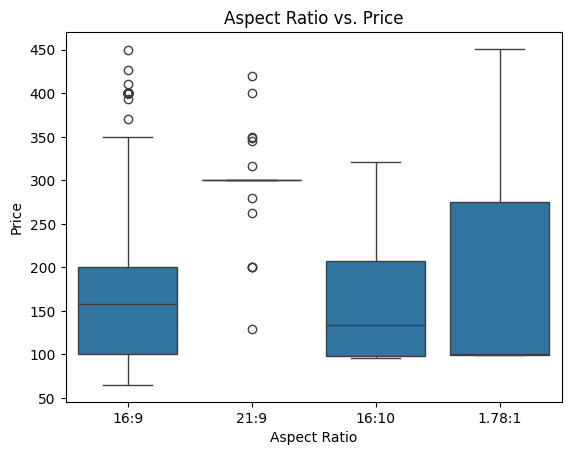

In [401]:
top_aspect_index = top_aspect.index
df_top_aspect = df2[df2['Aspect Ratio'].isin(top_aspect_index)]

sns.boxplot(data=df_top_aspect, x='Aspect Ratio', y='Price')
plt.title('Aspect Ratio vs. Price')
plt.show()

### Gaming vs. Price

<Axes: xlabel='Gaming', ylabel='Price'>

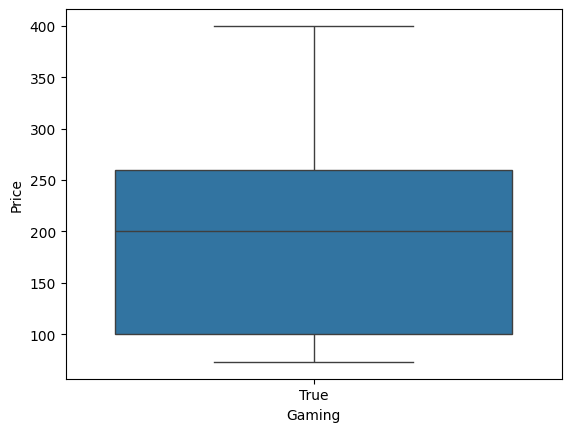

In [402]:
sns.boxplot(data=df2[df2['Gaming']== True], x='Gaming', y='Price')

## Correlation

### One-Hot Encoding

In [403]:
from sklearn import preprocessing

categorical_cols = ['Brand', 'Resolution','Aspect Ratio']   #categorical columns
enc = preprocessing.OneHotEncoder(sparse_output=False)      #create a onehotencoder

one_hot = enc.fit_transform(df2[categorical_cols])      # fit and transform the categorical columns to onehotencoder
new_columns = enc.get_feature_names_out(categorical_cols)   # get the names of the new one hot encoded columns
one_hot_df = pd.DataFrame(one_hot, columns=new_columns)     # create a df of the one hot encoded columns

one_hot_df = one_hot_df.reset_index(drop=True)
df2 = df2.reset_index(drop=True)       # need to reset index in order to concatenate properly

df2_encoded = pd.concat([df2.drop(columns = categorical_cols), one_hot_df], axis=1)     # concat df2 and the encoded df 

df2_encoded.shape

(822, 82)

### .corr()

In [404]:
df_corr = df2.drop(columns = ['Brand', 'Title', 'Aspect Ratio', 'Resolution'])
df_corr.corr()

,Screen Size,Rating,Price,UHD,FHD,Gaming,Curved,HDR,Adaptive,Blue_Light,AMD_FreeSync,Height_Adjust,Tilt,Ultra_Thin
Screen Size,1.000000,-0.040767,0.363607,0.165793,-0.369465,0.199944,0.510179,0.483896,0.079388,0.230305,0.191077,-0.077110,-0.108025,-0.008158
Rating,-0.040767,1.000000,-0.190443,-0.683709,0.427835,-0.230887,0.348814,-0.275543,-0.058074,-0.351405,0.128134,0.245473,-0.133688,-0.025211
Price,0.363607,-0.190443,1.000000,0.533792,-0.694375,0.290537,0.324394,0.695069,-0.265610,-0.223886,0.192497,-0.143708,-0.552733,-0.032019
UHD,0.165793,-0.683709,0.533792,1.000000,-0.642505,0.282032,-0.236418,0.584653,-0.233923,0.228907,0.263957,-0.130070,-0.015593,-0.015812
FHD,-0.369465,0.427835,-0.694375,-0.642505,1.000000,-0.366739,-0.182822,-0.594325,0.345069,0.025622,-0.272650,0.174747,0.326586,0.024611
Gaming,0.199944,-0.230887,0.290537,0.282032,-0.366739,1.000000,0.371144,0.484833,-0.186552,-0.043416,0.332104,-0.386222,-0.330273,-0.046158
Curved,0.510179,0.348814,0.324394,-0.236418,-0.182822,0.371144,1.000000,0.418025,-0.256800,-0.320224,0.254163,-0.147762,-0.554139,0.064761
HDR,0.483896,-0.275543,0.695069,0.584653,-0.594325,0.484833,0.418025,1.000000,-0.353109,-0.041223,0.402612,-0.201743,-0.385723,-0.025562
Adaptive,0.079388,-0.058074,-0.265610,-0.233923,0.345069,-0.186552,-0.256800,-0.353109,1.000000,0.285994,-0.704915,-0.129710,0.426023,-0.018019
Blue_Light,0.230305,-0.351405,-0.223886,0.228907,0.025622,-0.043416,-0.320224,-0.041223,0.285994,1.000000,-0.079653,-0.189313,0.555598,-0.021163


In [405]:
df_corr.columns

Index(['Screen Size', 'Rating', 'Price', 'UHD', 'FHD', 'Gaming', 'Curved',
       'HDR', 'Adaptive', 'Blue_Light', 'AMD_FreeSync', 'Height_Adjust',
       'Tilt', 'Ultra_Thin'],
      dtype='object')

<Axes: >

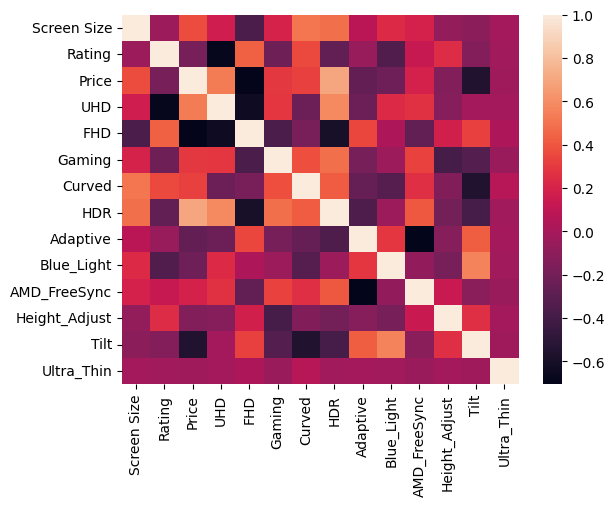

In [406]:
sns.heatmap(df_corr.corr())

## Linear Regression Model

In [407]:
df2_encoded = df2_encoded.drop(columns = 'Title')
df2_encoded.head()

,Screen Size,Rating,Price,UHD,FHD,Gaming,Curved,HDR,Adaptive,Blue_Light,...,Resolution_XGA,Resolution_XGA+ Wide,Aspect Ratio_1.27:1,Aspect Ratio_1.77:1,Aspect Ratio_1.78:1,Aspect Ratio_16:10,Aspect Ratio_16:9,Aspect Ratio_2.35:1,Aspect Ratio_21:9,Aspect Ratio_Unknown
0,23.8,4.4,94.99,False,True,True,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,31.5,4.6,259.99,False,True,True,True,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,27.0,4.5,99.99,False,True,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30.0,4.5,199.97,False,True,True,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31.5,4.3,279.99,True,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [408]:
# creating inputs and targets

inputs = df2_encoded.loc[:, df2_encoded.columns != 'Price']
targets = df2_encoded['Price']

In [409]:
from sklearn.linear_model import LinearRegression #type: ignore
from sklearn.metrics import mean_squared_error

model = LinearRegression()      # create linear regression model
model.fit(inputs, targets)      # fit inputs and target to model
predictions = model.predict(inputs)     # predict price of inputs using model

loss = mean_squared_error(predictions, targets)**0.5        # calculate rmse loss
loss

25.914902087739073

In [410]:
print(model.score(inputs, targets))     # calculate coefficient of determination

0.9207300503222319


In [411]:
from sklearn.model_selection import train_test_split

# create test data using test size of 0.2
train_input, test_input, train_target, test_target = train_test_split(inputs, targets, test_size=0.2)

model = LinearRegression()
model.fit(train_input, train_target)
predictions = model.predict(test_input)

print(model.score(inputs, targets))
# loss = mean_squared_error(predictions, test_target)**0.5
# loss

0.8974801685109304
